In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os

# Directory with our training horse pictures
train_covid_dir = os.path.join('/content/drive/My Drive/Colab Notebooks/COVID IMAGE/two/train/covid')

# Directory with our training human pictures
train_normal_dir = os.path.join('/content/drive/My Drive/Colab Notebooks/COVID IMAGE/two/train/normal')

In [5]:
train_covid_names = os.listdir(train_covid_dir)
print(train_covid_names[:10])

train_normal_names = os.listdir(train_normal_dir)
print(train_normal_names[:10])

['covid9.jpeg', 'covid11.jpeg', 'covid43.jpeg', 'covid44.jpeg', 'covid34.jpeg', 'covid42.jpeg', 'covid46.jpeg', 'covid13.jpeg', 'covid10.jpeg', 'covid47 (1).jpeg']
['normal29.jpeg', 'normal58.jpeg', 'normal43.jpeg', 'normal62.jpeg', 'normal1.jpeg', 'normal69.jpeg', 'normal28.jpeg', 'normal34.jpeg', 'normal60.jpeg', 'normal14.jpeg']


In [6]:
print('total training covid images:', len(os.listdir(train_covid_dir)))
print('total training normal images:', len(os.listdir(train_normal_dir)))

total training covid images: 61
total training normal images: 70
ERROR! Session/line number was not unique in database. History logging moved to new session 60


In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

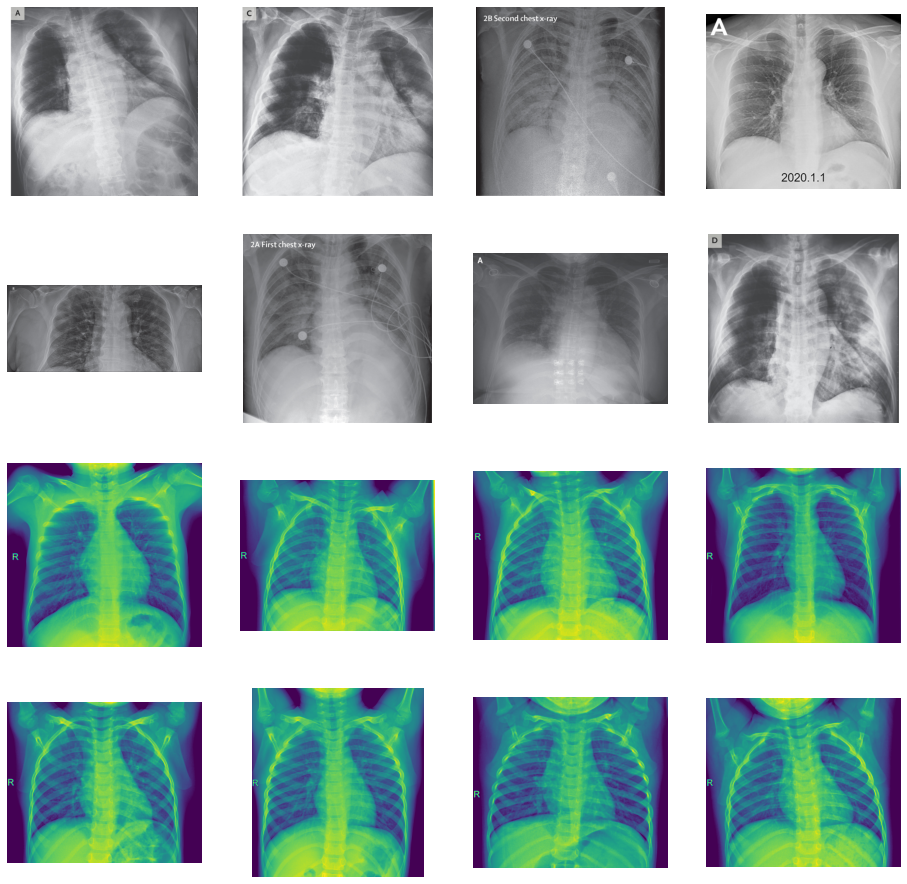

In [8]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next__pix = [os.path.join(train_covid_dir, fname) 
                for fname in train_covid_names[pic_index-8:pic_index]]
next_normal_pix = [os.path.join(train_normal_dir, fname) 
                for fname in train_normal_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_covid_pix+next_normal_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [46]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # # The third convolution
    # tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    # tf.keras.layers.MaxPooling2D(2,2),
    # # The fourth convolution
    # tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    # tf.keras.layers.MaxPooling2D(2,2),
    # # The fifth convolution
    # tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    # tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(128, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 41472)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               5308544   
_________________________________________________________________
dense_7 (Dense)              (None, 1)                

In [0]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

In [48]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/content/drive/My Drive/Colab Notebooks/COVID IMAGE/two/train',  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=10,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# All images will be rescaled by 1./255
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/content/drive/My Drive/Colab Notebooks/COVID IMAGE/two/test',  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=9,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 131 images belonging to 2 classes.
Found 18 images belonging to 2 classes.


In [49]:
history = model.fit(
      train_generator,
      steps_per_epoch=13,  
      epochs=5,
      validation_data = validation_generator,
      validation_steps = 1,
      verbose=1)

Epoch 1/5
13/13 [==============================] - 6s 451ms/step - loss: 1.7074 - accuracy: 0.6538 - val_loss: 0.2098 - val_accuracy: 1.0000
Epoch 2/5
13/13 [==============================] - 6s 455ms/step - loss: 0.2634 - accuracy: 0.9174 - val_loss: 0.1547 - val_accuracy: 0.8889
Epoch 3/5
13/13 [==============================] - 6s 432ms/step - loss: 0.0674 - accuracy: 0.9917 - val_loss: 0.0312 - val_accuracy: 1.0000
Epoch 4/5
13/13 [==============================] - 6s 432ms/step - loss: 0.0600 - accuracy: 0.9752 - val_loss: 0.1071 - val_accuracy: 0.8889
Epoch 5/5
13/13 [==============================] - 6s 436ms/step - loss: 0.0108 - accuracy: 1.0000 - val_loss: 0.3235 - val_accuracy: 0.8889


In [29]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a normal")
  else:
    print(fn + " is a covid")

Saving NORMAL2-IM-1385-0001.jpeg to NORMAL2-IM-1385-0001 (3).jpeg
Saving NORMAL2-IM-1396-0001.jpeg to NORMAL2-IM-1396-0001 (3).jpeg
Saving NORMAL2-IM-1400-0001.jpeg to NORMAL2-IM-1400-0001 (2).jpeg
Saving NORMAL2-IM-1401-0001.jpeg to NORMAL2-IM-1401-0001 (3).jpeg
Saving NORMAL2-IM-1406-0001.jpeg to NORMAL2-IM-1406-0001 (3).jpeg
Saving NORMAL2-IM-1412-0001.jpeg to NORMAL2-IM-1412-0001 (2).jpeg
Saving NORMAL2-IM-1419-0001.jpeg to NORMAL2-IM-1419-0001 (2).jpeg
Saving NORMAL2-IM-1422-0001.jpeg to NORMAL2-IM-1422-0001 (1).jpeg
Saving NORMAL2-IM-1423-0001.jpeg to NORMAL2-IM-1423-0001 (1).jpeg
[0.]
NORMAL2-IM-1385-0001.jpeg is a covid
[0.]
NORMAL2-IM-1396-0001.jpeg is a covid
[0.]
NORMAL2-IM-1400-0001.jpeg is a covid
[1.]
NORMAL2-IM-1401-0001.jpeg is a normal
[1.]
NORMAL2-IM-1406-0001.jpeg is a normal
[1.]
NORMAL2-IM-1412-0001.jpeg is a normal
[1.]
NORMAL2-IM-1419-0001.jpeg is a normal
[1.]
NORMAL2-IM-1422-0001.jpeg is a normal
[0.]
NORMAL2-IM-1423-0001.jpeg is a covid
